Creating a Heatmap Showing the relationship between Location, Purchase Amount, and Previous Purchases

In [1]:
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import scipy
import PIL
import requests

Loading our Dataset

In [2]:
# load data, removing spaces in column headers
columns = ["Customer_ID", "Age", "Gender", "Item_Purchased", "Item_Category", "Purchase_Amount_(USD)", "Location", "Color", "Season", "Review_Rating", "Subscription_Status", "Shipping_Type", "Discount_Applied", "Promo_Code_Used", "Previous_Purchases", "Payment_Method", "Frequency_of_Purchases"]
df = pd.read_csv("../data/Customers3_oversampled.csv", header = 0, names = columns)
df

,Customer_ID,Age,Gender,Item_Purchased,Item_Category,Purchase_Amount_(USD),Location,Color,Season,Review_Rating,Subscription_Status,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,3514,30,Female,Blouse,Clothing,74,Alaska,Charcoal,Spring,4.2,No,Store Pickup,No,No,29,Credit Card,Fortnightly
3582,3583,23,Female,Shorts,Clothing,41,California,Beige,Summer,3.4,No,2-Day Shipping,No,No,15,PayPal,Annually
2940,2941,61,Female,Handbag,Accessories,85,Massachusetts,Beige,Summer,4.8,No,Next Day Air,No,No,13,Cash,Monthly
3375,3376,51,Female,Boots,Footwear,98,Connecticut,Yellow,Fall,4.9,No,Express,No,No,8,Credit Card,Annually


Creating the Heatmap

<Axes: xlabel='Metric', ylabel='Location'>

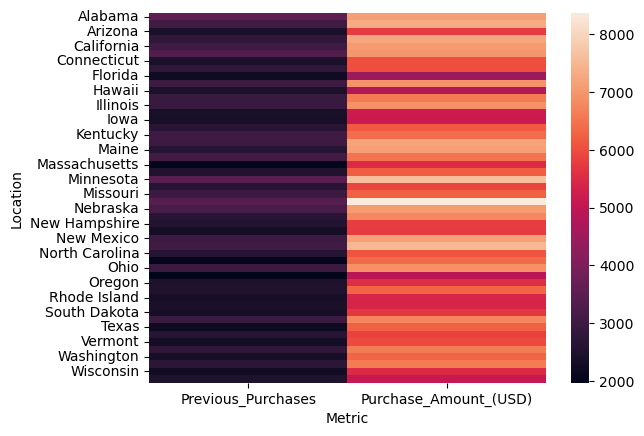

In [3]:
# dataframe of just target values 
grouped = df.groupby("Location").agg({"Purchase_Amount_(USD)" : "sum", "Previous_Purchases" : "sum"}).reset_index()
melted = grouped.melt(id_vars="Location", var_name="Metric", value_name="Value")
# heatmapping location by purchase amount by previous purchases
heatmap_data = melted.pivot(index = "Location", columns = "Metric", values = "Value")
sns.heatmap(heatmap_data)

Conclusion: there is a clear relationship between volume of purchases and value of purchases by location. We explore the intricacies of these relationships (i.e. breakdown by gender, item category, etc.) over the course of our visualizations.